<a href="https://colab.research.google.com/github/hargurjeet/MachineLearning/blob/master/Clustering_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset Preprocessing

In [1]:
!pip install opendatasets

In [2]:
# To Imporing dataset from kaggle
import opendatasets as od

# For data preprocessing
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTENC

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
import pylab

# Librareis for building pipelines
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# To build ML models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [3]:
\od.download('https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hargurjeet
Your Kaggle Key: ··········


100%|██████████| 1.55k/1.55k [00:00<00:00, 204kB/s]

In [4]:
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


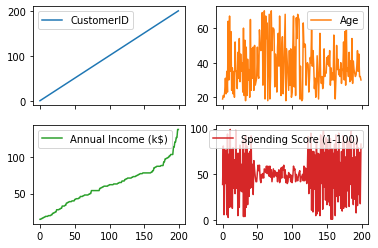

In [7]:
df.plot(subplots=True, layout=(2,2));

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

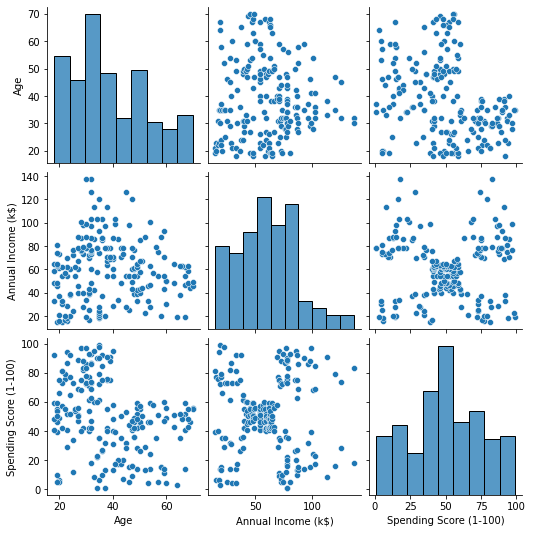

In [9]:
sns.pairplot(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
import matplotlib.pyplot as plt

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


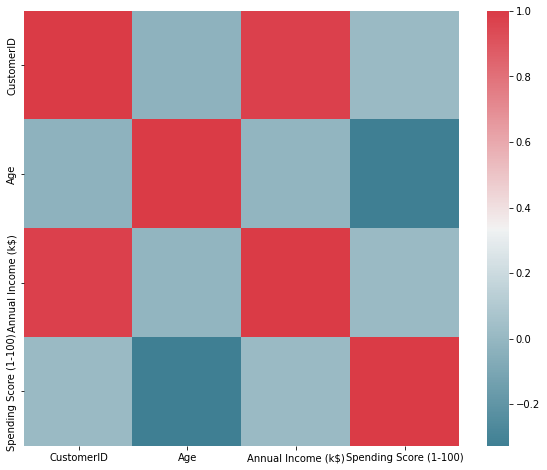

In [11]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [12]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})


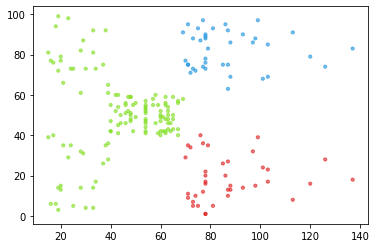

In [13]:

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df.c, alpha = 0.6, s=10)


In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cen_x,cen_y,c
0,1,Male,19,15,39,1,44.154472,49.829268,#81DF20
1,2,Male,21,15,81,1,44.154472,49.829268,#81DF20
2,3,Female,20,16,6,1,44.154472,49.829268,#81DF20
3,4,Female,23,16,77,1,44.154472,49.829268,#81DF20
4,5,Female,31,17,40,1,44.154472,49.829268,#81DF20


In [15]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending Score (1-100)','Annual Income (k$)']])

In [16]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

In [17]:
kmeans.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [18]:
df['Clusters'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cen_x,cen_y,c,Clusters
0,1,Male,19,15,39,1,44.154472,49.829268,#81DF20,3
1,2,Male,21,15,81,1,44.154472,49.829268,#81DF20,1
2,3,Female,20,16,6,1,44.154472,49.829268,#81DF20,3
3,4,Female,23,16,77,1,44.154472,49.829268,#81DF20,1
4,5,Female,31,17,40,1,44.154472,49.829268,#81DF20,3


In [19]:
df.Clusters.value_counts().sort_values()

1    22
3    23
2    35
0    39
4    81
Name: Clusters, dtype: int64

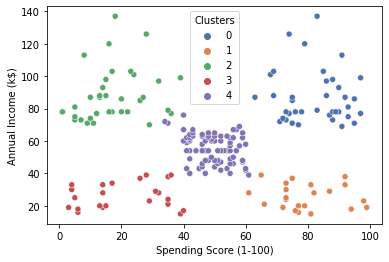

In [20]:
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df, palette="deep", 
    sizes=(20, 200), legend="full");

elbow technique to indetify clusters

In [21]:
import sklearn.cluster as cluster

In [23]:
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df_Short = df[['Spending Score (1-100)','Annual Income (k$)']]


In [25]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [26]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37233.814511
6,7,30552.714025
7,8,25022.485005
8,9,21850.165283
9,10,19721.547527


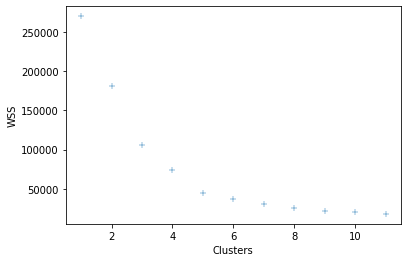

In [27]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 5 Clusters

In [28]:
import sklearn.metrics as metrics

In [29]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187
Silhouette score for k(clusters) = 11 is 0.4472950813160941
Silhouette score for k(clusters) = 12 is 0.4257901147260263
